In [1]:
import numpy as np
import ppplot
import ppcompute
from ppclass import pp
%matplotlib inline
ppplot.changefont(16)
import matplotlib.pyplot as mpl
mpl.rcParams['font.family'] = "times" # for good log major/minor ticks
mpl.rcParams['lines.linewidth'] = 3.0

In [2]:
fifi = "/home/aspiga/data/dynamico-giant/precast_Xhistins_171.nc" # burst 6.95 > 7 (when migrated)
fifi = "/home/aspiga/data/dynamico-giant/precast_Xhistins_41.nc" # 1.64 > 1.67 (strong burst)
#fifi = "/home/aspiga/data/dynamico-giant/precast_Xhistins_172.nc" # 7.04 fin

In [3]:
zz = 8e4 #3e3
ww = 4 #30 #20
ttts = 0.
ttte = 1.e10
ttt = str(ttts)+","+str(ttte)

In [4]:
edd,x,y,z,t = pp(file=fifi,t = ttt,x = 999,z = zz,var = "acceddh",verbose=True).getfd()
edds = ppcompute.smooth1d(edd,window=ww)
ys = ppcompute.smooth1d(y,window=ww)

# vertical term is negligible
rmc = pp(file=fifi,t = ttt,x = 999,z = zz,var = "accrmch").getf()
rmcs = ppcompute.smooth1d(rmc,window=ww)

acc = pp(file=fifi,t = ttt,x = 999,z = zz,var = "dudt").getf()
accs = ppcompute.smooth1d(acc,window=ww)

ustart = pp(file=fifi,var="u",t=ttts,x = 999, z=zz).getf()
uend   = pp(file=fifi,var="u",t=ttte,x = 999, z=zz).getf()
dudt = (uend - ustart) / (1000.*38052.)
dudts = ppcompute.smooth1d(dudt,window=ww)
ustart = ppcompute.smooth1d(ustart,window=ww)
uend = ppcompute.smooth1d(uend,window=ww)

---------------------------------------------------------------
**** INSPECT FILE /home/aspiga/data/dynamico-giant/precast_Xhistins_41.nc
---------------------------------------------------------------
**** DIMENSIONS:
<type 'netCDF4._netCDF4.Dimension'>: name = 'time_counter', size = 50

<type 'netCDF4._netCDF4.Dimension'>: name = 'pseudoalt', size = 50

<type 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 360

<type 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 1

---------------------------------------------------------------
**** VARIABLES:  [u'time_counter', u'pseudoalt', u'latitude', u'longitude', u'Ls', u'p', u'u', u'temperature', u'angmom', u'wangmom', u'superindex', u'amt_mmc', u'vpup', u'vptp', u'eke', u'tpot', u'N2', u'effbeta_bt', u'effbeta_bc', u'ushear', u'psi', u'Fphi', u'divFphi', u'divFp', u'vstar', u'EtoM', u'omegamean', u'omegastar', u'rmcdudt', u'edddudt', u'psim', u'accrmch', u'accrmcv', u'acceddh', u'dudt']
-----------------------------------

/home/aspiga/soft/conda/miniconda2/envs/py2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'times'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


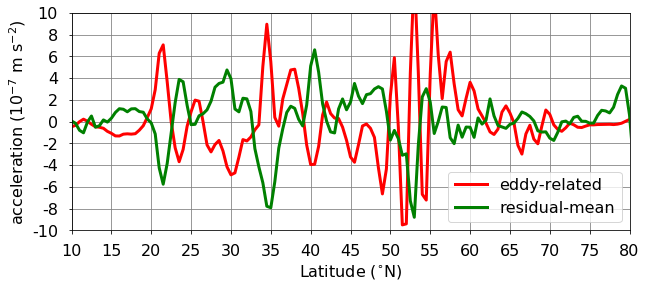

In [5]:
fig = ppplot.figuref(x=10,y=4)
pl = ppplot.plot1d(fig=fig)
pl.marker = None
pl.xmin = -80.
pl.xmin = 10.
pl.xmax = 80.
pl.nxticks = 15
pl.ymin = -10
pl.ymax = +10
pl.fmt = "%.0f"
pl.ylabel = r'acceleration ($10^{-7}$ m s$^{-2}$)'
pl.xlabel = r'Latitude ($^{\circ}$N)'
pl.x = ys

pl.f = edds*1.e7
pl.legend = "eddy-related"
pl.color = "r"
pl.make()
pl.f = rmcs*1.e7
pl.legend = "residual-mean"
pl.color = "g"
pl.make()

ppplot.save(mode="pdf",filename="dynbudg")

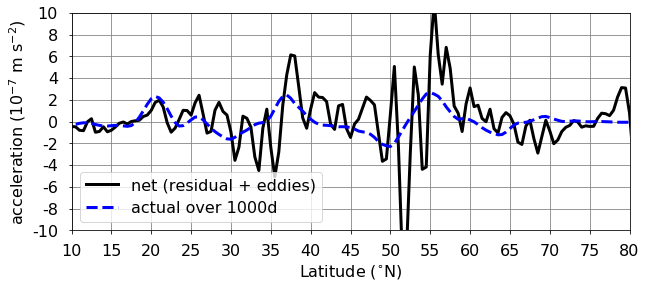

In [6]:
fig = ppplot.figuref(x=10,y=4)
pl = ppplot.plot1d(fig=fig)
pl.marker = None
pl.xmin = -80.
pl.xmin = 10.
pl.xmax = 80.
pl.nxticks = 15
pl.ymin = -10
pl.ymax = +10
pl.fmt = "%.0f"
pl.ylabel = r'acceleration ($10^{-7}$ m s$^{-2}$)'
pl.xlabel = r'Latitude ($^{\circ}$N)'
pl.x = ys

pl.f = accs*1.e7
pl.legend = "net (residual + eddies)"
pl.color = "k"
pl.make()

pl.f = dudts*1.e7
pl.legend = "actual over 1000d"
pl.linestyle = "--"
pl.color = "b"
pl.make()

mpl.legend(loc="lower left")
ppplot.save(mode="pdf",filename="dynbudgacc")

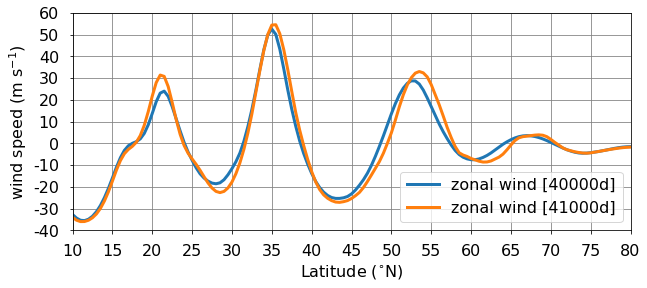

In [7]:
fig = ppplot.figuref(x=10,y=4)
pl = ppplot.plot1d(fig=fig)
pl.marker = None
pl.xmin = -80.
pl.xmin = 10.
pl.xmax = 80.
pl.nxticks = 7
pl.nxticks = 15
pl.ymin = -40
pl.ymax = +60
pl.fmt = "%.0f"
pl.ylabel = r'wind speed (m s$^{-1}$)'
pl.xlabel = r'Latitude ($^{\circ}$N)'
pl.x = ys

pl.f = ustart
pl.legend = "zonal wind [40000d]"
pl.make()

pl.f = uend
pl.legend = "zonal wind [41000d]"
pl.make()

ppplot.save(mode="pdf",filename="dynbudgwind")